In [1]:
import numpy as np

# Given data for PCA
data = np.array([
    [1, 1, -1, 0],
    [0, 1, -1, 1],
    [-1, 0, 1, 1],
    [1, -1, 0, -1],
    [-1, -1, 1, -1]
])

# Perform PCA by first computing the covariance matrix of the data
cov_matrix = np.cov(data.T)  # Transpose because np.cov expects variables in rows

# Then perform eigen decomposition on the covariance matrix to find the eigenvalues
eigenvalues, _ = np.linalg.eig(cov_matrix)

# The proportion of variance explained by each principal component is given by its eigenvalue
# divided by the sum of all eigenvalues
proportion_variance_explained = eigenvalues / np.sum(eigenvalues)

# The fourth principal component is associated with the smallest eigenvalue
# Because of potential numerical issues, we sort the eigenvalues before selecting the smallest
sorted_proportions = np.sort(proportion_variance_explained)
pve_fourth_component = sorted_proportions[0]  # Smallest eigenvalue

pve_fourth_component


0.010723304703363119

In [ ]:
# Ensure compatibility
from __future__ import absolute_import, division, print_function

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import TensorFlow and Keras packages
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.15.0


In [ ]:
from google.colab import files


# Importing the dataset
uploaded = files.upload()  # Allows to upload files to Google Colab

import io
filename = list(uploaded.keys())[0]  # Gets the filename of the uploaded file
data1 = pd.read_csv(io.BytesIO(uploaded[filename]))  # Reads the uploaded file into a DataFrame

Saving joined_data.csv to joined_data (2).csv


In [ ]:
data1.head()

,transaction_ID,transaction_date,Year_Birth,Marital_Status,MntFruits,Education,Income,children_categorical,teen_categorical,income_standardize,maritalstat_categorical,spender_class
0,6653,7/30/12,1970,Married,0,PhD,55158,1,1,0.332539,1,0
1,6181,7/31/12,1950,Not Married,21,2n Cycle,52203,0,0,0.314147,0,0
2,4692,8/1/12,1976,Married,0,Graduation,7500,1,0,0.035913,1,0
3,2611,8/1/12,1959,Not Married,55,Master,82576,0,0,0.503190,0,1
4,10001,8/1/12,1985,Not Married,17,2n Cycle,7500,1,0,0.035913,0,0


In [ ]:
data1.tail()

,transaction_ID,transaction_date,Year_Birth,Marital_Status,MntFruits,Education,Income,children_categorical,teen_categorical,income_standardize,maritalstat_categorical,spender_class
2210,1371,6/28/14,1976,Not Married,164,Graduation,79941,0,0,0.486789,0,1
2211,6722,6/28/14,1954,Married,28,PhD,70421,0,1,0.427536,1,1
2212,8093,6/28/14,1969,Married,8,Master,79734,0,0,0.485501,1,0
2213,7300,6/29/14,1952,Not Married,4,Graduation,69142,0,1,0.419576,0,0
2214,453,6/29/14,1956,Not Married,0,PhD,35340,1,1,0.209190,0,0


In [ ]:
data1nparray = data1.values

In [ ]:
# Define independent variables

TrainData   = data1nparray[:, [7, 8, 9, 10]]
# Define dependent variable

TrainLabels = data1nparray[:, [11]]

In [ ]:
TrainDataFloat = TrainData.astype(float)

In [ ]:
TrainDataFloat

array([[1.        , 1.        , 0.33253873, 1.        ],
       [0.        , 0.        , 0.31414665, 0.        ],
       [1.        , 0.        , 0.03591279, 1.        ],
       ...,
       [0.        , 0.        , 0.48550107, 1.        ],
       [0.        , 1.        , 0.41957589, 0.        ],
       [1.        , 1.        , 0.20919044, 0.        ]])

In [ ]:
TrainLabelsInt = TrainLabels.astype(int)

In [ ]:
TrainLabelsInt

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [ ]:
model.compile(
              optimizer='adam',
#             optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(TrainDataFloat, TrainLabelsInt, epochs=20)

Epoch 1/20
70/70 [==============================] - 1s 2ms/step - loss: 0.6381 - accuracy: 0.6542
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7133
Epoch 3/20
70/70 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.7133
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7133
Epoch 5/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.7129
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.7693
Epoch 7/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.7923
Epoch 8/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.7919
Epoch 9/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4452 - accuracy: 0.7910
Epoch 10/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.7905
Epoch 11/20
70/70 [

In [ ]:
train_loss, train_acc = model.evaluate(TrainDataFloat, TrainLabelsInt)

print('Train accuracy:', train_acc)


70/70 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8054
Train accuracy: 0.8054175972938538


In [ ]:
predictions = model.predict(TrainDataFloat)


70/70 [==============================] - 0s 2ms/step


In [ ]:
class_names = ['low_spender', 'high_spender']


In [ ]:
print(len(predictions[0]))
print(len(class_names))

2
2


In [ ]:
def plot_image(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array[i])
  if predicted_label == true_label[i][0]:
    TextColor = 'blue'
  else:
    TextColor = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(
                                  class_names[predicted_label],
                                  100*np.max(predictions_array[i]),
                                  class_names[true_label[i][0]]
                                  ),
                                color=TextColor)

def plot_value_array(i, predictions_array, true_label):
  plt.grid(True)
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array[i])
  thisplot = plt.bar(range(len(predictions_array[0])), predictions_array[i], color="#777777")

  # if the true label equals the predicted label, then the blue color will overwrite the red color
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[i][0]].set_color('blue')


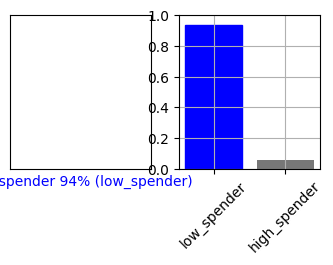

In [ ]:
i = 0
# width, height
plt.figure(figsize=(4,2))

# nrows, ncols, index
plt.subplot(1,2,1)
# Create summary plot on left side
plot_image(i, predictions, TrainLabelsInt)
# nrows, ncols, index
plt.subplot(1,2,2)
# Create bar plot on right side
plot_value_array(i, predictions, TrainLabelsInt)
# Label X axis with classification names
plt.xticks(range(len(predictions[0])), class_names, rotation=45)
# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [ ]:
predictions[0]


array([0.9379988 , 0.06200111], dtype=float32)

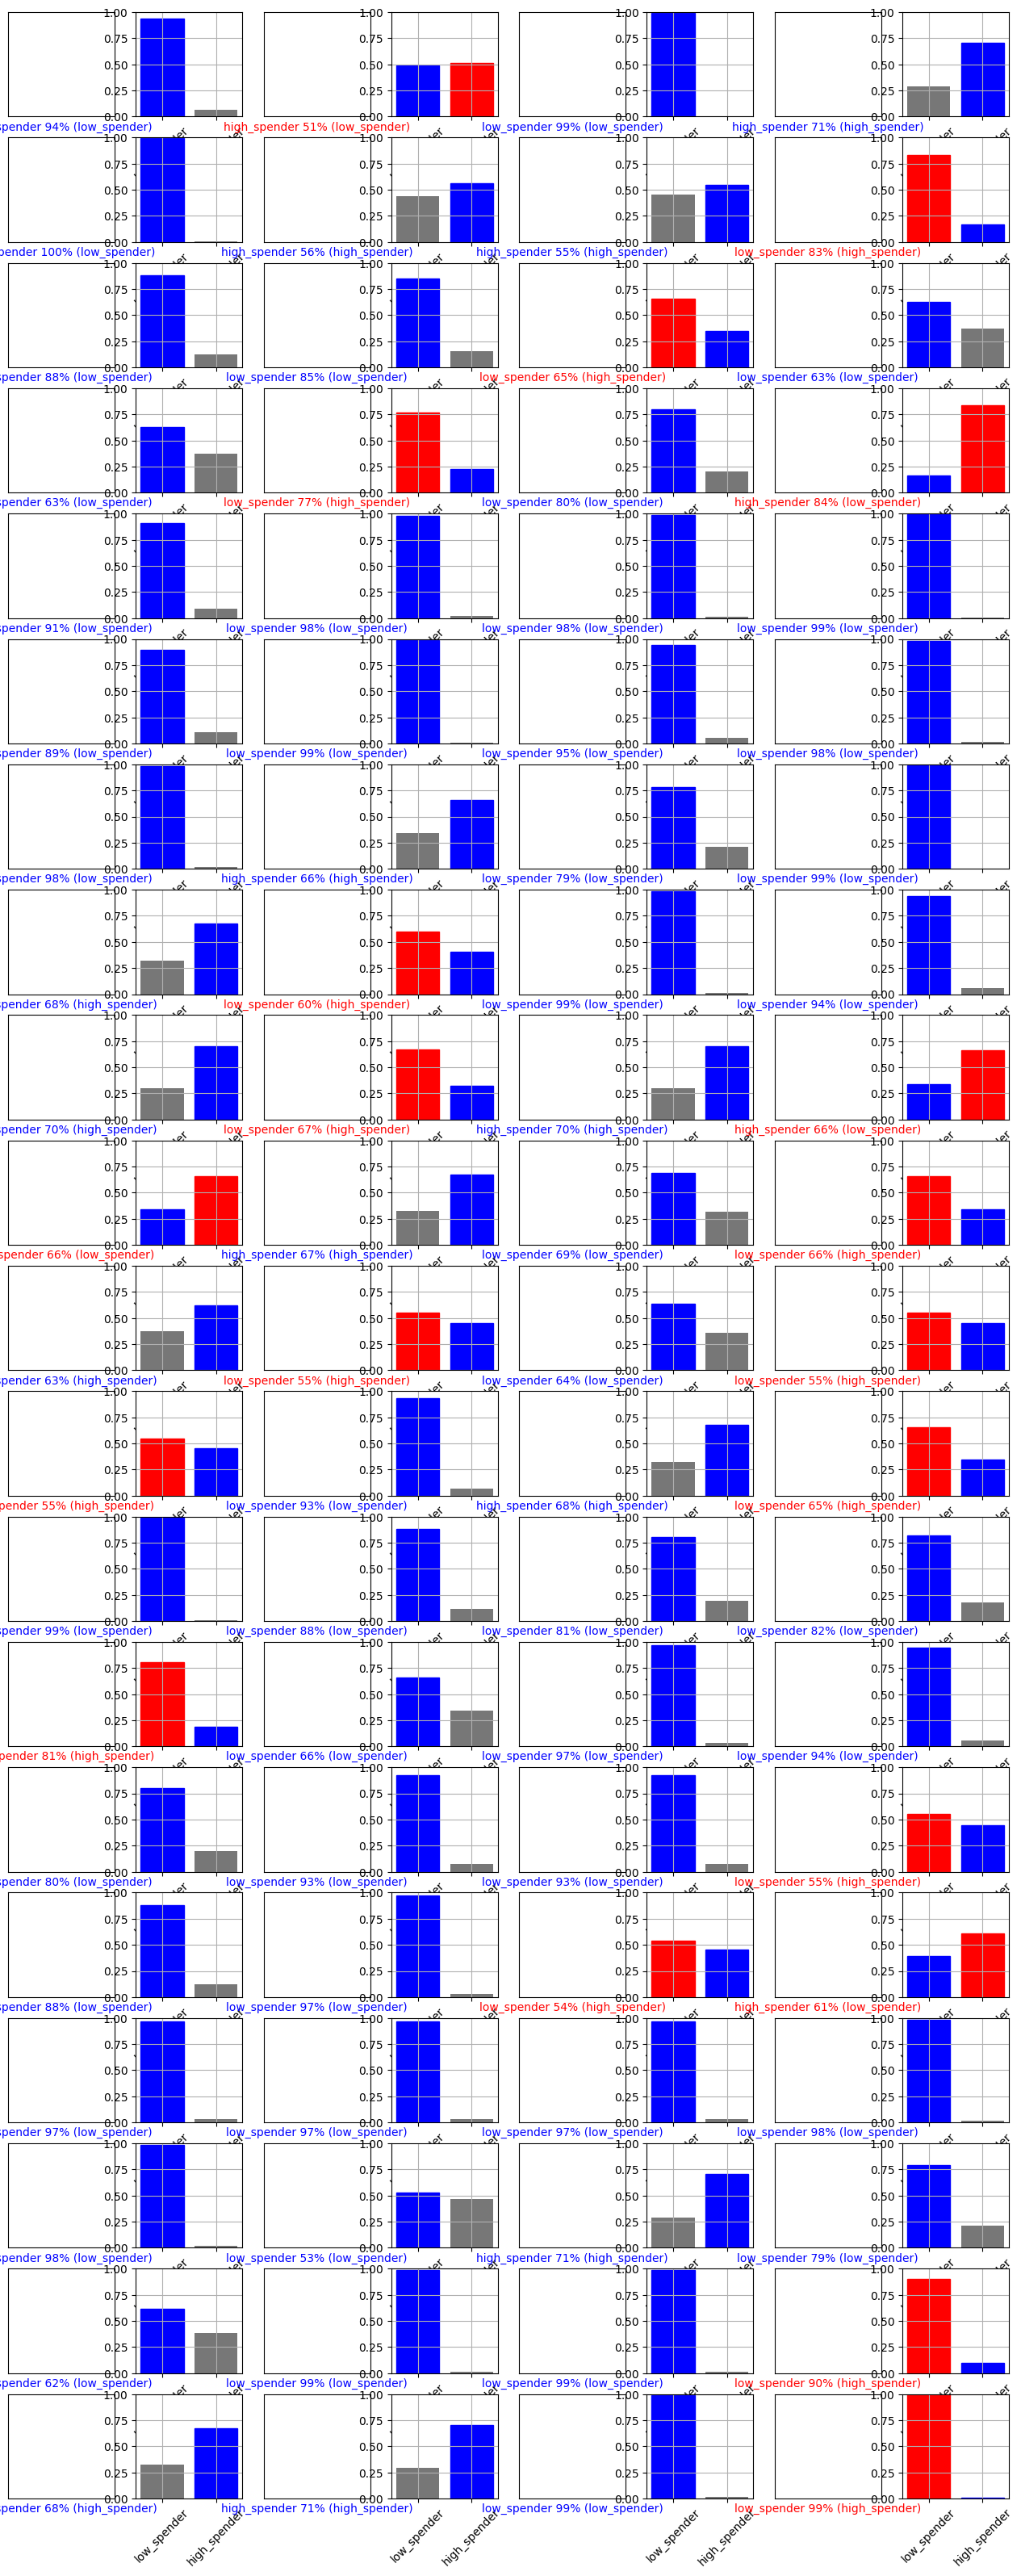

In [ ]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
# width, height
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Create each plot
for i in range(num_images):
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Create summary plot on left side
  plot_image(i, predictions, TrainLabelsInt)
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # Create bar plot on right side
  plot_value_array(i, predictions, TrainLabelsInt)
  # Label X axis with classification names
  plt.xticks(range(len(predictions[0])), class_names, rotation=45)

# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [ ]:
layer0 = model.get_layer(index=0)


In [ ]:
layer0.get_weights()

[array([[ 0.435793  ,  0.21875857,  0.2897101 ,  0.428958  ,  0.5259825 ,
         -0.0379525 , -0.4052737 ,  0.29018283, -0.0979488 , -0.18341574,
         -0.17799728, -0.23461062,  0.38030273, -0.01033885,  0.29819775,
          0.00637168],
        [ 0.38289756,  0.07515421, -0.05895523, -0.02651456, -0.33201066,
          0.26364163,  0.12214397, -0.41195476,  0.16531776,  0.45035943,
         -0.10821366, -0.00637706,  0.4491647 ,  0.03614864,  0.35592106,
          0.13845497],
        [ 0.3987074 ,  0.54669464, -0.33478367,  0.14689484, -0.5544704 ,
         -0.6465888 , -0.22508986,  0.6647367 ,  1.138891  , -0.03738476,
         -0.07008744,  0.5760311 , -0.11776546,  0.50896394, -0.7370947 ,
         -0.83749604],
        [ 0.4248739 ,  0.40432593,  0.4048448 , -0.3589067 ,  0.10899457,
          0.12737896, -0.14808032,  0.44159082,  0.14046234, -0.08589404,
          0.4486995 ,  0.3434272 ,  0.38482141, -0.5081385 , -0.30266583,
          0.04911818]], dtype=float32),
 ar

In [ ]:
layer1 = model.get_layer(index=1)

In [ ]:
layer1.get_weights()

[array([[-4.39674526e-01,  1.76255316e-01,  1.01763584e-01,
         -1.27678975e-01, -3.26645166e-01,  2.13322163e-01,
          2.48812109e-01,  4.34363991e-01],
        [ 5.68311475e-02, -5.00759959e-01,  1.95339248e-01,
         -9.95708629e-04,  2.06650361e-01,  4.43637699e-01,
         -2.58047227e-02, -5.95210254e-01],
        [ 2.98217058e-01, -8.53073597e-03, -3.69106293e-01,
          6.04999065e-01,  4.47731733e-01, -4.90587801e-01,
          6.13941699e-02,  2.61312008e-01],
        [-8.22129697e-02,  4.41520005e-01,  1.16228014e-01,
          8.82092938e-02,  4.33318019e-02, -2.13008642e-01,
          3.96162093e-01,  2.16412842e-01],
        [ 4.46319461e-01, -2.69041032e-01,  7.46196926e-01,
          3.48846972e-01,  1.17487889e-02, -2.91109860e-01,
          1.08198330e-01,  5.68020284e-01],
        [ 1.00511515e+00,  5.27197123e-02,  7.34170854e-01,
          3.64218324e-01,  2.57183671e-01, -5.24314165e-01,
         -1.31991476e-01,  7.32985258e-01],
        [ 1.8222

In [ ]:
layer2 = model.get_layer(index=2)

In [ ]:
layer2.get_weights()

[array([[ 1.0356911 , -0.7740297 ],
        [-0.55457014,  0.6652859 ],
        [ 0.49147514, -0.6544927 ],
        [-0.2825868 , -1.1075491 ],
        [-0.42341384,  0.49546224],
        [-0.5751011 ,  0.1841932 ],
        [ 0.36348462, -0.09205621],
        [ 0.35024196, -0.19202727]], dtype=float32),
 array([-0.08733599,  0.08733597], dtype=float32)]

In [ ]:
# Create data frame that contains predictions
predictionsDF = pd.DataFrame(
    data=predictions,
    columns=class_names
    )


In [ ]:
# Create external file that contains the predictions
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=True, index=False)


In [ ]:
# Create one-dimensional array
TrainLabelsInt1D = np.ndarray.copy(TrainLabelsInt[:,0])

# Determine predicted outcomes and whether predicted outcomes equal actual outcomes
PredictedLabels1D   = np.ndarray.copy(TrainLabelsInt1D)
PredictedOutcomes1D = np.ndarray.copy(TrainLabelsInt1D)
for i in range(len(TrainLabelsInt1D)):
    PredictedLabels1D[i] = np.argmax(predictions[i])
    if PredictedLabels1D[i] == TrainLabelsInt1D[i]:
        PredictedOutcomes1D[i] = 1
    else:
        PredictedOutcomes1D[i] = 0

In [ ]:
TrainLabelsInt1D

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
PredictedLabels1D

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
PredictedOutcomes1D

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
tf.math.confusion_matrix(
    TrainLabelsInt1D,
    PredictedLabels1D,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
    )

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1396,  184],
       [ 247,  388]], dtype=int32)>

In [ ]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
from sklearn.metrics import confusion_matrix

ClassificationMatrix = confusion_matrix(
    TrainLabelsInt1D,
    PredictedLabels1D
    )
print('Classification Matrix')
print(ClassificationMatrix)

Classification Matrix
[[1396  184]
 [ 247  388]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(TrainLabelsInt1D, PredictedLabels1D)))

Accuracy: 0.81


In [ ]:
# Sensitivity is also called true positive rate (TPR) or recall
print('Sensitivity: {:.2f}'.format(recall_score(TrainLabelsInt1D, PredictedLabels1D, average='micro')))

Sensitivity: 0.81


In [ ]:
# Create two-dimensional array
PredictedLabels2D      = np.ndarray.copy(TrainLabelsInt)
PredictedLabels2D[:,0] = np.ndarray.copy(PredictedLabels1D)

PredictedOutcomes2D      = np.ndarray.copy(TrainLabelsInt)
PredictedOutcomes2D[:,0] = np.ndarray.copy(PredictedOutcomes1D)

In [ ]:
PredictedLabels1D

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
PredictedLabels2D

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
PredictedOutcomes1D

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
PredictedOutcomes2D

array([[1],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
TrainDataLabels                        = np.append(TrainDataFloat, TrainLabelsInt, axis=1)
TrainDataLabelsPredictions             = np.append(TrainDataLabels, PredictedLabels2D, axis=1)
TrainDataLabelsPredictionsOutcomes     = np.append(TrainDataLabelsPredictions, PredictedOutcomes2D, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions, axis=1)

In [ ]:
# Define header

HeaderNames = ['children','teen','income','marital', 'SpenderClassActual', 'SpenderClassPrediction', 'SpenderClassAccurate',
    'LowSpenderProbability', 'HighSpenderProbability']

# Create data frame
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb,
    columns=HeaderNames
    )

In [ ]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=True, index=False)
# Updates made upto this point in the program for the new dataset

In [ ]:
# Create directory to save model
!mkdir -p Models

In [ ]:
# Save model
tf.keras.models.save_model(
    model,
    "Models",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
    )

In [ ]:
# Load saved model
new_model = tf.keras.models.load_model("Models")


In [ ]:
# Print summary of original model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 234 (936.00 Byte)
Trainable params: 234 (936.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Print summary of loaded model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 234 (936.00 Byte)
Trainable params: 234 (936.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#CycNorm, DefNorm, CosNorm
#Each ranges from 0 to 1
SingleObservation = np.array([[1, 0, 0.9, 1]])
SingleObservationFloat = SingleObservation.astype(float)

SinglePrediction         = model.predict(SingleObservationFloat)
SinglePredictionNewModel = new_model.predict(SingleObservationFloat)

# Print prediction
print(SinglePrediction[0])
print(SinglePredictionNewModel[0])

1/1 [==============================] - 0s 37ms/step
[0.16722523 0.8327748 ]
[0.16722523 0.8327748 ]


In [ ]:
SinglePrediction[0]

array([0.16722523, 0.8327748 ], dtype=float32)

In [ ]:
SinglePredictionNewModel[0]

array([0.16722523, 0.8327748 ], dtype=float32)

In [ ]:
np.max(SinglePrediction[0])

0.8327748

In [ ]:
np.argmax(SinglePrediction[0])

1

In [ ]:
class_names[np.argmax(SinglePrediction[0])]

'high_spender'

In [ ]:
!date

Tue Apr 23 01:52:09 AM UTC 2024
